In [1]:
import numpy as np

def rosenbrock(x):
    return np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:1])**2.0,axis=0)

C:\Users\user\AppData\Local\Temp/ipykernel_8/2607164435.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


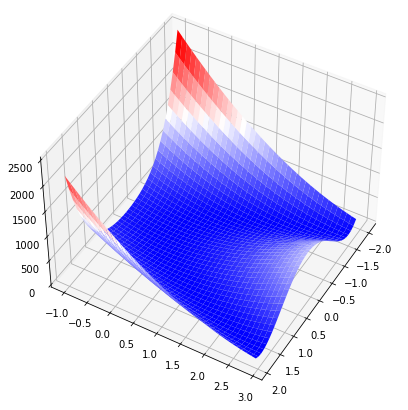

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=[10, 7])
ax = fig.gca(projection='3d')
ax.view_init(45, 30)

X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock(np.array([X, Y]))

surf = ax.plot_surface(X, Y, Z, cmap='bwr')
plt.show()

In [8]:
#найдем глобальный минимум используя метод розен...
from scipy.optimize import minimize

In [9]:
#задать начальную точку из которой метод будет рабртать
x0 = np.array([1.2, 0.7, 2.1])

In [14]:
#обратимся к ф-и минимизации и укажем что будем работать с методом
#Нелдер Мида
#(ф-я которую хотим минимизировать, начальная точка из которой работаем, выбираем метод Нелдера Мида
#обозначить уловие остановки вычисления - условие по точности (xtol необходимая точность решения, disp параметр отображения, для удобства визуализации) )

res = minimize(rosenbrock, x0, method='nelder-mead', options={'xtol':1e-8, 'disp':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 145
         Function evaluations: 259


In [15]:
#число итераций
res.nit

145

In [16]:
#исходный результат
res.x

array([1., 1., 1.])

In [17]:
#как будет вести себя метод при работе из рахных начальных точек


In [31]:
#создадим случайную начальную точку random
# равномерное распределение uniform
#диапозон от 0 до 2
#размерность задачи 6
x0 = np.random.uniform(low=0, high=2, size=(5,))

In [32]:
x0

array([1.98357028, 1.96901644, 1.24869394, 0.4928014 , 0.67196133])

In [33]:
#ф-я минимайз для полученной случайной точки
res = minimize(rosenbrock, x0, method='nelder-mead', options={'xtol':1e-8, 'disp':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 473
         Function evaluations: 791


In [34]:
#усреднить эти результаты по различным начальным точкам
it_list = [] #пустой список для хранения информации по числу итераций
res_list = [] #список для результатов оптимизаций



In [46]:
#число операций 100
for kk in range(100):
    x0 = np.random.uniform(low=0, high=2, size=(4,)) #генерируем случайную начальную точку
    
    #вызываем метод (парам disp false  чтобы не выводилось диагностич сообщение)
    res = minimize(rosenbrock, x0, method='nelder-mead', options={'xtol':1e-8, 'disp':False})
    
    it_list.append(res.nit)
    res_list.append(rosenbrock(res.x))

In [39]:
#it_list

In [40]:
#res_list

In [47]:
#для оценки значенй эксперемента вычислим среднее знач
np.mean(res_list)

1.0587359731314778e-07

In [48]:
np.max(res_list)

4.227613895417412e-05

In [49]:
#сколько алгоритм работал в худшем и лучшем случае
np.min(it_list)

240

In [51]:
np.max(it_list)

489